Exercise1: Logistic Regression with Sklearn

In [1]:
from sklearn import datasets
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import io

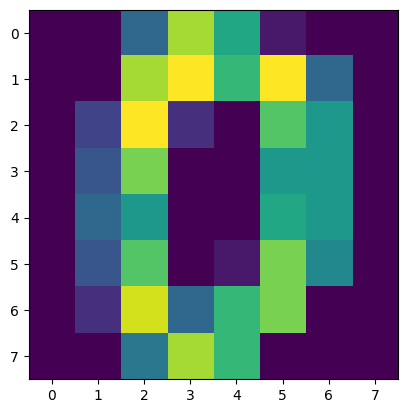

In [2]:
X, y = datasets.load_digits(return_X_y=True)

reshaped_array = X[0].reshape(8, 8)
plt.imshow(reshaped_array)

Split in train and test set

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 200, random_state=42)
X_train.shape, X_test.shape

((1597, 64), (200, 64))

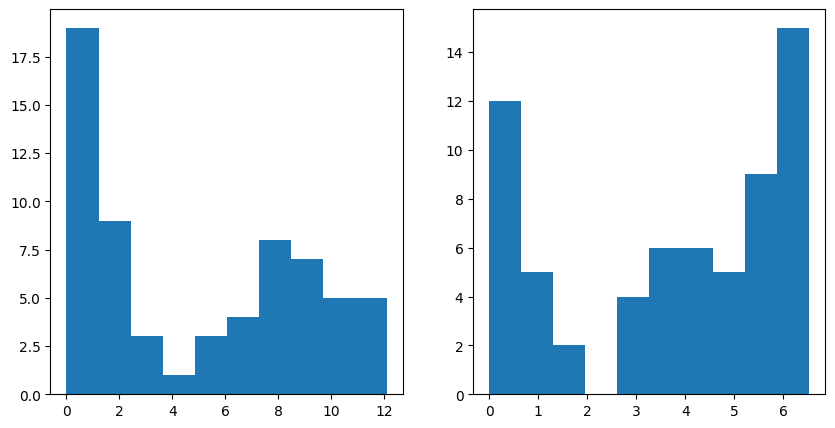

In [4]:
# plot the distribution of mean and std before the standardization
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].hist(X_train.mean(axis=0))
ax[1].hist(X_train.std(axis=0))
plt.show()

normalize data

In [5]:
from sklearn.preprocessing import StandardScaler

# standardize features
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

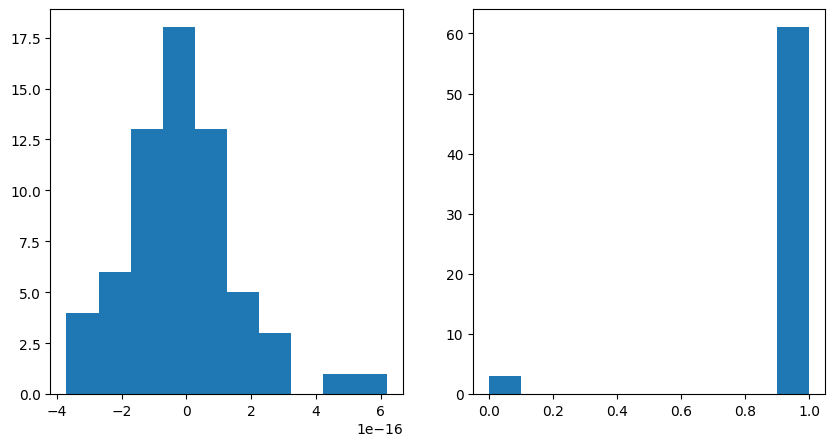

In [6]:
# plot the distribution after standardization
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].hist(X_train.mean(axis=0))
ax[1].hist(X_train.std(axis=0))
plt.show()

Train linear regression model on the training set

In [25]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(fit_intercept = True,
                         multi_class = 'auto',
                         penalty = 'l2', # ridge regression
                         solver = 'saga',
                         max_iter = 1000000000,
                         C = 50)
clf.fit(X_train, y_train)
clf.predict(X_test[0].reshape(1, -1))
acc = clf.score(X_test, y_test)
print(f'Test set accuracy: {acc}')

Test set accuracy: 0.98


In [22]:
# clf = LogisticRegression(multi_class = 'multinomial')
# clf.fit(X_train, y_train)
# print(f'Test set accuracy: {clf.score(X_test, y_test)}')

use PCA

In [26]:
from sklearn.decomposition import PCA
# train Logistic Regressor after applying PCA with different levels of retained variances
vars = np.arange(0.5, 1, 0.05)
accuracies = []
n_comps = []

for var in vars:
  pca = PCA(var) # keep var% variance
  pca.fit(X_train)

  X_pca_train = pca.transform(X_train)
  X_pca_test = pca.transform(X_test)

  # apply the logistic regressor on the data with reduced features
  regressor = LogisticRegression()
  regressor.fit(X_pca_train, y_train)

  n_comps.append(pca.n_components_)
  accuracies.append(regressor.score(X_pca_test, y_test))

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

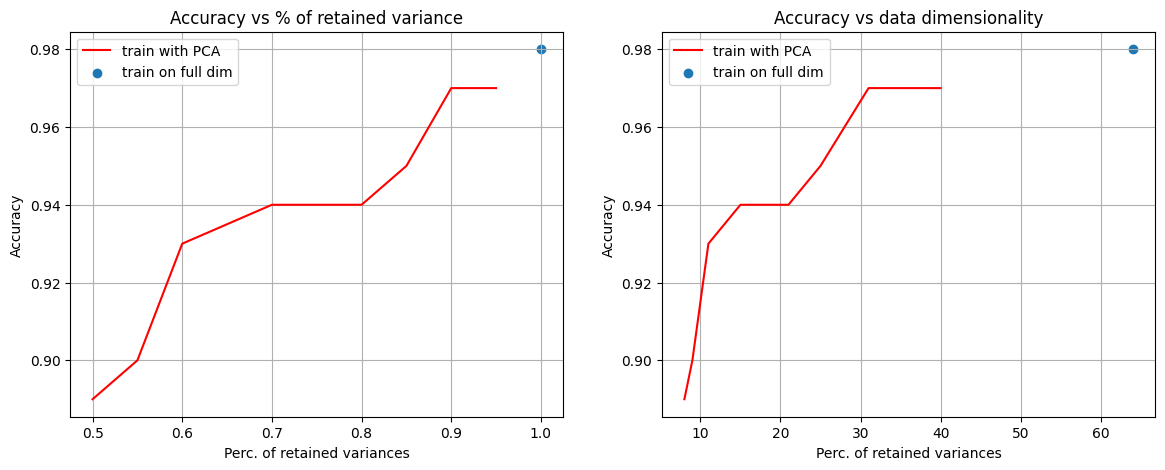

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
# plot the obtained score with increasing portion of explained variance in the data
# the plot on the right reports how many components were actually kept
i = 0
ax[i].set_title('Accuracy vs % of retained variance')
ax[i].plot(vars, accuracies, c='red', label='train with PCA')
ax[i].scatter(1, acc, label='train on full dim')
ax[i].set_xlabel('Perc. of retained variances')
ax[i].set_ylabel('Accuracy')
ax[i].legend()
ax[i].grid()

i = 1
ax[i].set_title('Accuracy vs data dimensionality')
ax[i].plot(n_comps, accuracies, c='red', label='train with PCA')
ax[i].scatter(64, acc, label='train on full dim')
ax[i].set_xlabel('Perc. of retained variances')
ax[i].set_ylabel('Accuracy')
ax[i].legend()
ax[i].grid()

plt.show()

**Full MNIST database**

In [42]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml(data_id=554)

/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


''

In [29]:
mnist.data.shape, mnist.target.shape

((70000, 784), (70000,))

#*Exercise 2*# 

In [43]:
!git clone https://github.com/zalandoresearch/fashion-mnist.git

Cloning into 'fashion-mnist'...
remote: Enumerating objects: 762, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 762 (delta 0), reused 3 (delta 0), pack-reused 758
Receiving objects: 100% (762/762), 105.85 MiB | 31.62 MiB/s, done.
Resolving deltas: 100% (444/444), done.


In [44]:
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, 

In [46]:
%cd /content/fashion-mnist/utils
import mnist_reader


%cd /content/fashion-mnist
X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')
X_train.shape

/content/fashion-mnist/utils
/content/fashion-mnist


(60000, 784)

In [47]:
from sklearn.pipeline import Pipeline

# apply standardization and PCA
steps = [('scaling', StandardScaler()), ('pca', PCA(n_components = 0.85))]
pipeline = Pipeline(steps)
X_train = pipeline.fit_transform(X_train)
pipeline['pca'].n_components_

81

In [49]:
# now we take x_train which was mapped to the reduced sub-space,
# and apply the inverse transform. The inverse transform is simply
# a matrix multiplication that maps the data back to the original space.
# Of course this inverse transform will not obtain the original data. The
# 15% variance that was not explained by the PCA is lost
x_train_retransformed = pipeline.inverse_transform(X_train)
X_train.shape, x_train_retransformed.shape

((60000, 81), (60000, 784))

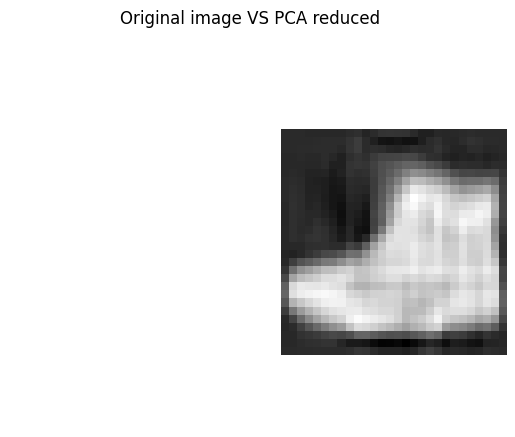

In [52]:
# now we plot an original sample, and its version obtained with the
# inverse transform

fig, (ax1, ax2) = plt.subplots(1, 2)
# ax1.matshow(X_train[0].reshape(28,28), cmap='gray')
ax2.matshow(x_train_retransformed[0].reshape(28,28), cmap='gray')
ax1.set_axis_off()
ax2.set_axis_off()
fig.suptitle("Original image VS PCA reduced".format(y_train[0]))
plt.show()